In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
class plotten():
    '''
    Diese Klasse soll auf Basis einer Tabelle Graphen plotten.
    '''
    # Methoden mittel Instanzvariablen erzeugt
    def __init__(self, daten, name, start, ende): # Konstruktor
        self.daten = daten
        self.name = name
        self.start = start
        self.ende = ende
        
    def gesamtverbrauch_tag(self):
        tagesverbrauch = self.daten["Verbrauch (kWh)"].resample("D").sum() #Gibt den Tagesverbrauch aus
        plt.figure() # Es wird ein neues Fenster für diesen Plott erstellt
        sns.set_theme() # Das Farbschema wird auf das Standardtheme von seaborn gesetzt
        tabelle = tagesverbrauch[self.start :self.ende] # Daten werden auf Zeitraum beschränkt
        sns.lineplot(data = tabelle, label =self.name, marker = "o")# Daten werden geplottet
        plt.xticks(rotation = 25) # Beschriftung wird um 25 Grad gedreht
        
    def gesamtverbrauch_woche(self):
        wochenverbrauch = self.daten["Verbrauch (kWh)"].resample("W").sum() #Gibt den Wochenverbrauch aus
        plt.figure()
        sns.set_theme()
        tabelle = wochenverbrauch[self.start :self.ende]
        sns.lineplot(data = tabelle, label =self.name, marker = "o")
        plt.xticks(rotation = 25)
    
    def verbrauchstandorte(self):
        plt.figure()
        sns.set_theme()
        plt.xticks(rotation = 25)
        tabelle = self.daten[self.start :self.ende]    #Zeiraum als Str wird übernommen
        gruppieren= tabelle.groupby(["Ladepunkt"])     #gruppieren nach Spalte Ladepunkt
        print("GRUPPIEREN",gruppieren)

        try:
            wfh =gruppieren.get_group("WF Gebäude H")      
        except:
            print("Keine Daten H")
            
        try:
            salzgitter =gruppieren.get_group("Salzgitter")
        except:
            print("Keine Daten Salzgitter")
        try:
            wfr =gruppieren.get_group("WF Recht")
        except:
            print("Keine Daten Recht")
        try:
            wfh1 = wfh["Verbrauch (kWh)"].resample("W").sum()     #Die Dateien mit gleichem Standort und Zeit werden aufsummiert
        except:
            print("Keine Daten H")
            
        try:
            salzgitter1 = salzgitter["Verbrauch (kWh)"].resample("W").sum()
        except:
            print("Keine Daten Salzgitter")
        try:
            wfr1 = wfr["Verbrauch (kWh)"].resample("W").sum()
        except:
            print("Keine Daten Recht")

        try:
            sns.lineplot(data = salzgitter1,label = "WF Recht", marker = "o")      #Diagrammdarstellung mich Punkten 
        except:
            print("Salzgitter: Keine Daten")
        try:
             sns.lineplot(data = wfh1,label = "Salzgitter", marker = "o")
        except:
            print("WF Gebäude H: Keine Daten")
        try:
            sns.lineplot(data = wfr1,label = "WF Gebäude H", marker = "o")
        except:
            print("WF Recht: Keine Daten")
        
        plt.xlabel("Datum")

Datei wird nach bestimmten Bedingungen ausgeführt und angepasst

In [3]:
df= pd.read_csv("Alle-ladevorgänge-2022-03-16.csv", sep=";",encoding='latin-1',decimal=",") # 

Umbenennung der Ladesäulen

In [4]:
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E740796*001'],'Salzgitter')
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E740796*002'],'Salzgitter')
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E740796*003'],'Salzgitter')
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E740796*004'],'Salzgitter')

df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E809189*001'],'WF Recht')
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*E809189*002'],'WF Recht')

df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*EMLP1'],'WF Gebäude H') 
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*EMLP2'],'WF Gebäude H')

df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*ESLP1'],'WF Gebäude H') 
df['Ladepunkt'] = df['Ladepunkt'].replace(['DE*cem*ESLP2'],'WF Gebäude H')

In [5]:

df.rename(columns={'Monat (MM/JJJJ)': 'Date'}, inplace=True) #Date weil auch hier zu lang :D

####Leere Spalten löschen
df.drop('Stop-Grund', inplace=True, axis=1)
df.drop('Grund für die Auffälligkeit', inplace=True, axis=1)
df.drop('Kosten', inplace=True, axis=1)
df.drop('Provider', inplace=True, axis=1)
df.drop('Operator', inplace=True, axis=1)

df["Date"] = pd.to_datetime(df["Date"]) #Wandelt Date in eine Zeit um

df.set_index("Date", inplace = True)

In [6]:
negativ = df[ df['Verbrauch (kWh)'] < 0 ].index  # die negativen Werte werden gepspeichert
                                                # Reihen löschen die dieses Wert enthalten
df.drop(negativ , inplace=True)                 

Die Funktion plotten wird für die einzelnen Diagramme ausgeführt.
Es werden Datensatz, Titel des Diagramms und ein Zeitanfang und Zeitende in die Funktion gegeben.

C:\Users\NICOMI~1\AppData\Local\Temp/ipykernel_16720/4052441511.py:32: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  tabelle = self.daten[self.start :self.ende]    #Zeiraum als Str wird übernommen


GRUPPIEREN <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002437C6C66D0>
Keine Daten Recht
Keine Daten Recht
WF Recht: Keine Daten


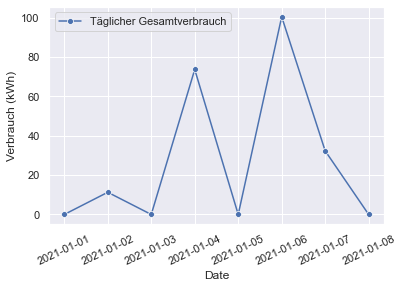

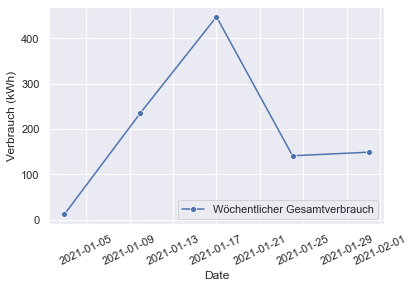

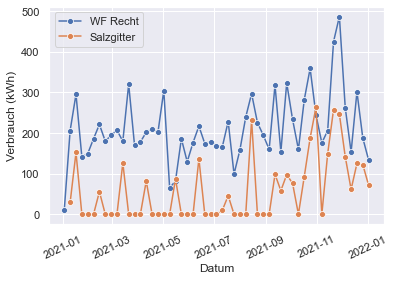

In [8]:
gesamtzeit_tagesverbrauch = plotten(df,"Täglicher Gesamtverbrauch","2021-01-01","2021-01-08")
gesamtzeit_tagesverbrauch.gesamtverbrauch_tag()

gesamtzeit_wochenverbrauch = plotten(df,"Wöchentlicher Gesamtverbrauch","2021-01-01","2021-02-01")
gesamtzeit_wochenverbrauch.gesamtverbrauch_woche()

standorte_wochenverbrauch = plotten(df,"Wöchentlicher Verbrauch nach Standort", "2021-01-01","2022-01-01")
standorte_wochenverbrauch.verbrauchstandorte()